In [1]:
import sys

import numpy as np
import pandas as pd

# import the Auto-ARIMA
import pmdarima as pm

import matplotlib.pyplot as plt

sys.path.append("..")
from utils import create_onedrive_directdownload

In [2]:
# load the dataset
onedrive_url = "https://1drv.ms/u/s!AiqdXCxPTydhofYbhA1ASJ6RZ3OjTw?e=Ie9x4h"
converted_url = create_onedrive_directdownload(onedrive_url)
df = pd.read_csv(converted_url, index_col="Month", parse_dates=True)

df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# make log return
df["LogPassengers"] = np.log(df["Passengers"])

In [4]:
# make test and train set
Ntest = 12
train = df.iloc[:-Ntest]
test  = df.iloc[-Ntest:]

In [5]:
## Now, Auto-ARIMA time

# trace: if true then we can see which model the Auto-ARIMA tests out while trying to find the best model
# supress_warnings: statsmodels has lots of warning. So, don't show those warnings
# seasonal: if true we want to fit full seasonal-ARIMA model
# m: the seasonal period
model = pm.auto_arima(train["Passengers"], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.20 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.47 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.26 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.07 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.20 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [6]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Wed, 01 Feb 2023   AIC                            905.686
Time:                                    23:08:57   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
# prediction time
test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

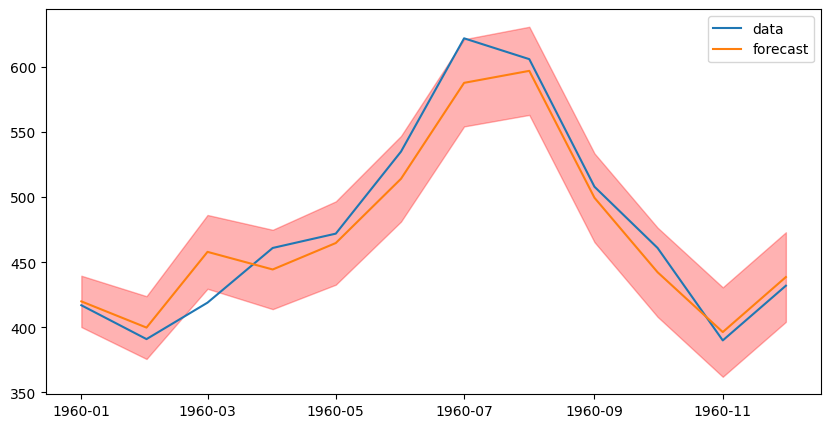

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["Passengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, \
    conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)
ax.legend()
plt.show()

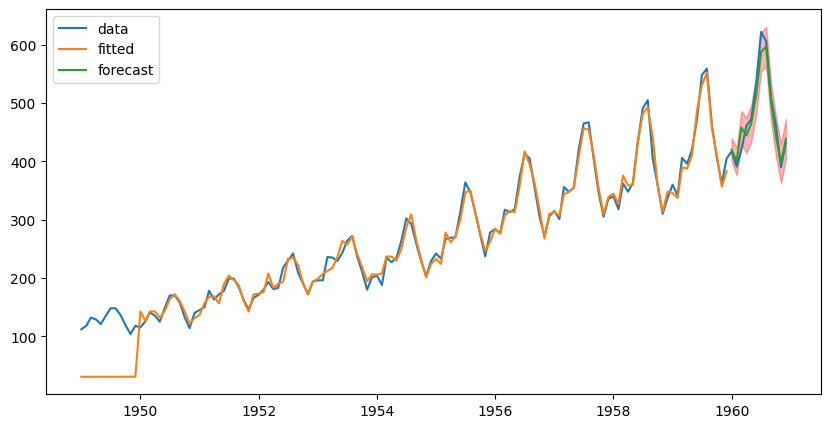

In [9]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["Passengers"], label="data")
ax.plot(train.index, train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)

ax.legend()
plt.show()

In [10]:
# now time to apply Auto-ARIMA with log return data
logmodel = pm.auto_arima(train["LogPassengers"], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.702, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.47 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=1.25 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.782, Time=0.34 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.330, Time=1.98 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.714, Time=0.84 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.574, Time=0.71 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.20 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.597, Time=0.99 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.344, Time=1.68 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [11]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Wed, 01 Feb 2023   AIC                           -448.052
Time:                                      23:09:26   BIC                           -434.114
Sample:                                  01-01-1949   HQIC                          -442.392
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0192      0.009      2.150      0.032       0.002       0.037
ar.L1          0.6007      0.083      7.280      0.000       0.439       0.762
ar.L2          0.2417      0.085      2.854      0.004       0.076       0.408
ma.S.L12      -0.5670      0.105     -5.418      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.193      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.06
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

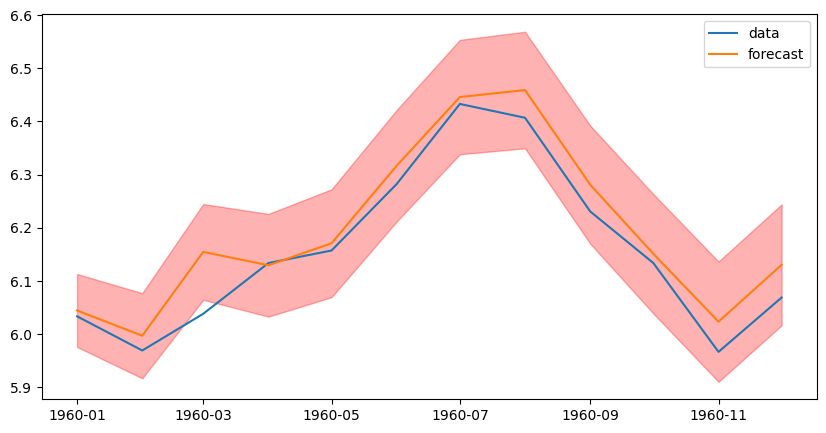

In [12]:
test_pred_log, log_conf_int = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, log_conf_int[:, 0], log_conf_int[:, 1], color="red", alpha=0.3)

ax.legend()
plt.show()

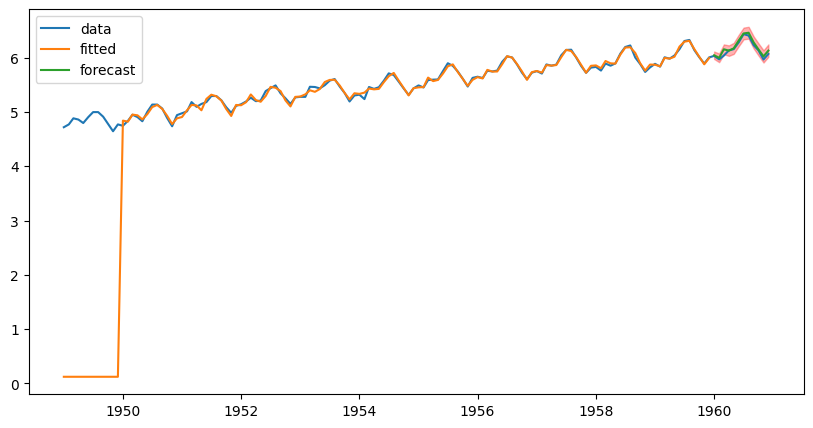

In [13]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogPassengers"], label="data")
ax.plot(train.index, train_pred_log, label="fitted")
ax.plot(test.index, test_pred_log, label="forecast")
ax.fill_between(test.index, log_conf_int[:, 0], log_conf_int[:, 1], color="red", alpha=0.3)
ax.legend()
plt.show()

In [14]:
### forecast RMSE
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

In [15]:
# what is the performance of our model?
print(f"Non-logged RMSE: {rmse(test['Passengers'], test_pred):.3f}")
print(f"Logged RMSE:        {rmse(test['Passengers'], np.exp(test_pred_log)):.3f}")

Non-logged RMSE: 18.536
Logged RMSE:        23.031


In [16]:
### non-seasonal data
model = pm.auto_arima(train["LogPassengers"], trace=True, suppress_warnings=True,
                                        max_p = 12,
                                        max_q = 2,
                                        max_order = 14,
                                        stepwise=True,
                                        seasonal=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-212.867, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-222.099, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-217.708, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-215.917, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-228.902, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-217.540, T

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 133.487
Date:                Wed, 01 Feb 2023   AIC                           -250.974
Time:                        23:09:31   BIC                           -227.973
Sample:                    01-01-1949   HQIC                          -241.628
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0102      0.002      5.447      0.000       0.007       0.014
ar.L1          0.0343      0.122      0.282      0.778      -0.204       0.273
ar.L2          0.4576      0.116      3.950      0.000       0.231       0.685
ar.L3         -0.2380      0.099     -2.396      0.017      -0.433      -0.043
ar.L4         -0.2471      0.107     -2.312      0.021      -0.457      -0.038
ma.L1         -0.0479      0.077     -0.620      0.535      -0.199       0.103
ma.L2         -0.8724      0.075    -11.669      0.000      -1.019      -0.726
sigma2         0.0075      0.001      5.502      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.70
Prob(Q):                              0.99   Prob(JB):                         0.06
Heteroskedasticity (H):               1.04   Skew:                             0.22
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

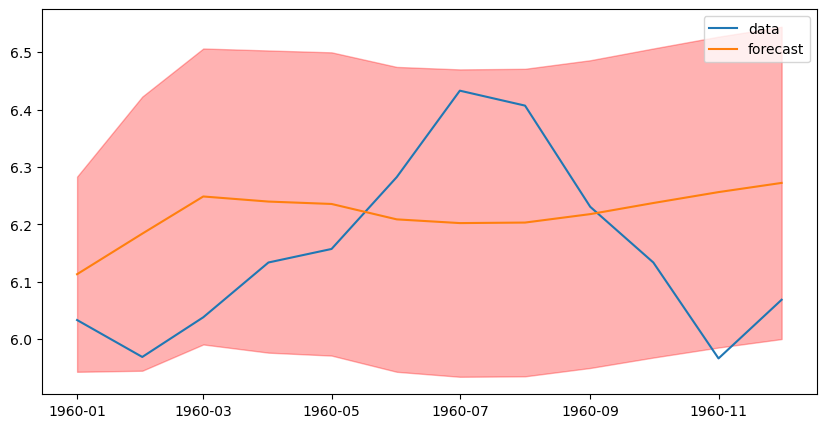

In [18]:
test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)
ax.legend();

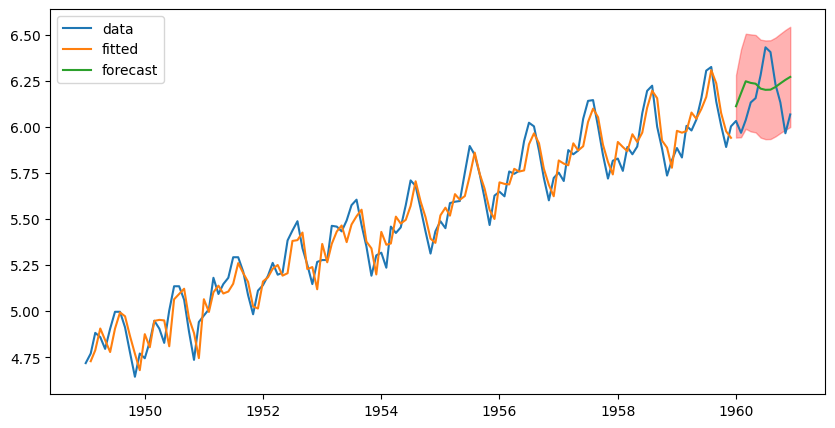

In [19]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogPassengers"], label="data")
ax.plot(train.index[1:], train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)
ax.legend();

In [20]:
rmse(test["Passengers"], np.exp(test_pred))

83.40806057702812

In [21]:
## Now time with grid search
model = pm.auto_arima(train["LogPassengers"], trace=True, suppress_warnings=True,
                                        max_p = 12,
                                        max_q = 2,
                                        max_order = 14,
                                        stepwise=False,  # only change
                                        seasonal=True
)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=-216.493, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=-214.718, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=-221.069, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=-216.622, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=-216.024, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=-246.402, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=-229.057, Time=0.12 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=-227.139, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[1] intercept   : AIC=-250.974, Time=0.32 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept  

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 228.566
Date:                Wed, 01 Feb 2023   AIC                           -427.131
Time:                        23:12:41   BIC                           -384.003
Sample:                    01-01-1949   HQIC                          -409.606
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0118      0.007      1.698      0.090      -0.002       0.025
ar.L1          0.0235      0.103      0.229      0.819      -0.178       0.225
ar.L2         -0.1541      0.070     -2.208      0.027      -0.291      -0.017
ar.L3         -0.0564      0.075     -0.750      0.454      -0.204       0.091
ar.L4         -0.1581      0.081     -1.964      0.050      -0.316      -0.000
ar.L5         -0.0187      0.074     -0.252      0.801      -0.164       0.126
ar.L6         -0.1344      0.071     -1.881      0.060      -0.274       0.006
ar.L7         -0.0597      0.079     -0.756      0.450      -0.215       0.095
ar.L8         -0.1769      0.072     -2.466      0.014      -0.317      -0.036
ar.L9         -0.0100      0.087     -0.114      0.909      -0.181       0.161
ar.L10        -0.1482      0.070     -2.122      0.034      -0.285      -0.011
ar.L11         0.0015      0.079      0.019      0.985      -0.153       0.156
ar.L12         0.7305      0.067     10.888      0.000       0.599       0.862
ma.L1         -0.3644      0.142     -2.574      0.010      -0.642      -0.087
sigma2         0.0016      0.000      7.333      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.43
Prob(Q):                              0.84   Prob(JB):                         0.30
Heteroskedasticity (H):               0.36   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

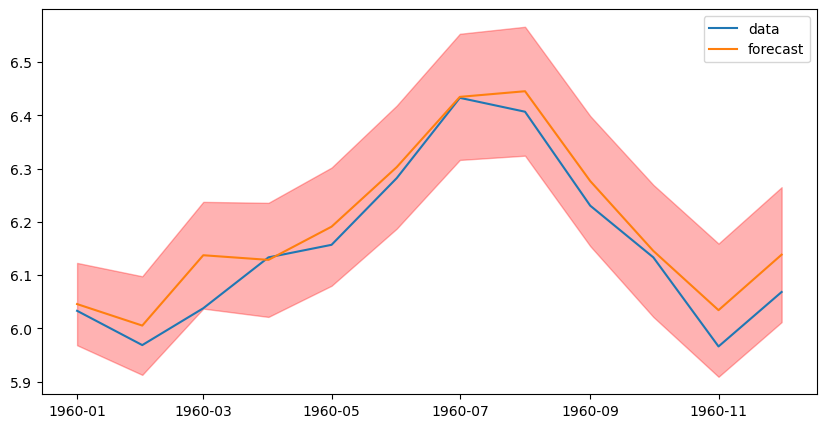

In [23]:
test_pred, conf_int = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test["LogPassengers"], label="data")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)
ax.legend();

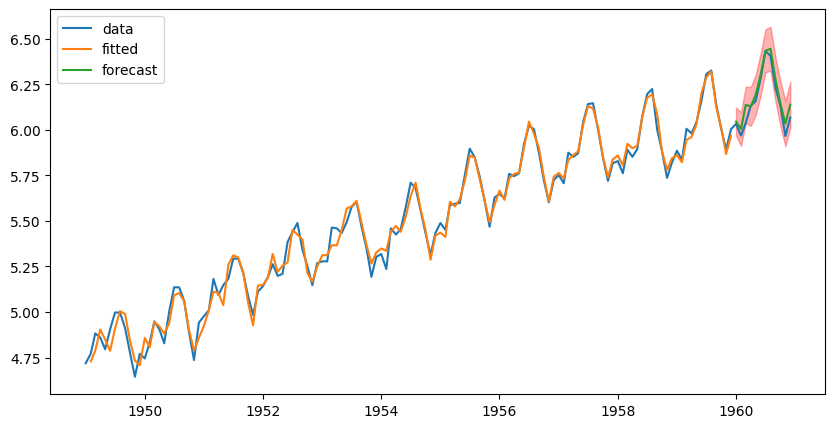

In [24]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df["LogPassengers"], label="data")
ax.plot(train.index[1:], train_pred, label="fitted")
ax.plot(test.index, test_pred, label="forecast")
ax.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.3)
ax.legend();

In [26]:
rmse(test["Passengers"], np.exp(test_pred))

# If you use ARIMA(12, 1, 0), then the RMSE ~= 18 which indicates the better model than this. This model is ARIMA(12, 1, 2)
# very close to the better model. Also it has a penalty term, but ARIMA(12, 1, 0) did not has.

21.363561073861124